# Dogbone specimen
This script generate the mesh for the dogbone specimen taken described in [Ambati, M., T. Gerasimov, and L. De Lorenzis. “Phase-Field Modeling of Ductile Fracture.” Computational Mechanics 55(5) (2015): 1017–40](https://doi.org/10.1007/s00466-015-1151-4).

In [1]:
import numpy as np
import gmsh
import sys

# Initialize the Gmsh API
gmsh.initialize()
gmsh.model.list()
gmsh.model.add("dogbone")

# meshsize
lc = 10.0

# coordinates, meshsize, tag
gmsh.model.geo.add_point(0 ,0,0,lc,1)
gmsh.model.geo.add_point(60,0,0,lc,2)
gmsh.model.geo.add_point(60,20,0,lc,3)
gmsh.model.geo.add_point(60,30,0,lc,4)
gmsh.model.geo.add_point(50,30,0,lc,5)
gmsh.model.geo.add_point(50,110,0,lc,6)
gmsh.model.geo.add_point(60,110,0,lc,7)
gmsh.model.geo.add_point(60,120,0,lc,8)
gmsh.model.geo.add_point(60,140,0,lc,9)
gmsh.model.geo.add_point(0,140,0,lc,10)
gmsh.model.geo.add_point(0,120,0,lc,11)
gmsh.model.geo.add_point(0,110,0,lc,12)
gmsh.model.geo.add_point(10,110,0,lc,13)
gmsh.model.geo.add_point(10,30,0,lc,14)
gmsh.model.geo.add_point(0,30,0,lc,15)
gmsh.model.geo.add_point(0,20,0,lc,16)

gmsh.model.geo.add_line(1,2,1)
gmsh.model.geo.add_line(2,3,2)
gmsh.model.geo.add_circle_arc(3,4,5,3)
gmsh.model.geo.add_line(5,6,4)
gmsh.model.geo.add_circle_arc(6,7,8,5)
gmsh.model.geo.add_line(8,9,6)
gmsh.model.geo.add_line(9,10,7)
gmsh.model.geo.add_line(10,11,8)
gmsh.model.geo.add_circle_arc(11,12,13,9)
gmsh.model.geo.add_line(13,14,10)
gmsh.model.geo.add_circle_arc(14,15,16,11)
gmsh.model.geo.add_line(16,1,12)

# list of points, tag
gmsh.model.geo.add_curve_loop([1,2,3,4,5,6,7,8,9,10,11,12],1)

# list of curvee loops, tag
gmsh.model.geo.add_plane_surface([1],1)

# dim, tag, anem
gmsh.model.add_physical_group(1, [1], name="constrained edge")
gmsh.model.add_physical_group(1, [7], name="load edge")
gmsh.model.add_physical_group(2, [1], name="dogbone surface")

# here we change the colors of some of the entities
gmsh.model.setColor([(1,1)],0,255,255,255,True)
gmsh.model.setColor([(1,7)],255,0,255,255,True)
gmsh.model.setColor([(2,1)],255,255,0,255,True)

# Synchronize the model to build the geometry
gmsh.model.geo.synchronize()

In [2]:
gmsh.option.setNumber("Mesh.Algorithm", 5)

# generate a 2d mesh
gmsh.model.mesh.generate(2)

# partitioned the mesh
# gmsh.model.mesh.partition(4)

gmsh.write("dogbone.vtk")
gmsh.write("dogbone.msh")
gmsh.write("dogbone.inp")


In [3]:

# Synchronize the model to build the geometry
gmsh.model.geo.synchronize()

# visualize the model, whatever you do here it is avaialble later in the script
if '-nopopup' not in sys.argv:
    gmsh.fltk.run()

In [4]:
# get the list of elements
elementTypes, elementTags, nodeTags = gmsh.model.mesh.get_elements(-1,-1)  

# show the properties for each time
for elementType in elementTypes:
    print(gmsh.model.mesh.get_element_properties(elementType))

('Line 2', 1, 1, 2, array([-1.,  1.]), 2)
('Triangle 3', 2, 1, 3, array([0., 0., 1., 0., 0., 1.]), 3)
('Point', 0, 0, 1, array([0.]), 1)


In [5]:
nodeTags, nodeCoords, nodeParams = gmsh.model.mesh.get_nodes(-1,-1)

In [6]:
print(gmsh.model.get_physical_groups())

# get the nodes for the physical group
nodeTags,nodeCoords = gmsh.model.mesh.get_nodes_for_physical_group(2,3)
nodeTags.shape,nodeCoords[2::3].shape

'''
cc = 0
for nodeCoord in np.array([nodeCoords]).reshape(-1,3):
    print(nodeCoord)
    gmsh.model.mesh.setNode(nodeCoord[0],nodeCoord[1]/2,nodeCoord[2])
    cc += 1
'''

[(1, 1), (1, 2), (2, 3)]


'\ncc = 0\nfor nodeCoord in np.array([nodeCoords]).reshape(-1,3):\n    print(nodeCoord)\n    gmsh.model.mesh.setNode(nodeCoord[0],nodeCoord[1]/2,nodeCoord[2])\n    cc += 1\n'

In [7]:
# here is how to plot results on gmsh
t1 = gmsh.view.add("Continuous")
for step in range(0, 10):
    gmsh.view.addHomogeneousModelData(
        t1, step, "dogbone", "NodeData",
        nodeTags,  # tags of nodes
        nodeCoords[0::3]/1000)  # data is the "x" coordinate of each node
    
gmsh.view.write(t1,"x4_t1.msh")

# Launch the GUI to see the results:
if '-nopopup' not in sys.argv:
    gmsh.fltk.run()

#gmsh.finalize()

In [8]:
nodeCoordsMat = np.reshape(nodeCoords,(-1,3))
nodeCoordsMat2 = np.unique(nodeCoordsMat,axis=0)
nodeCoordsMat.shape,nodeCoordsMat2.shape

gmsh.write("dogbone.vtk")

In [27]:
# Step 3: Save the array to a CSV file
np.savetxt('nodeCoordsMat.csv', nodeCoordsMat, delimiter=',')

In [1]:
import gmsh
import sys

gmsh.initialize(sys.argv)

# Contrary to list-based view (see `x3.py'), model-based views are based on one
# or more meshes. Compared to list-based views, they are thus linked to one
# model (per step). Post-processing data stored in MSH files create such
# model-based views.

# Let's create a first model-based view using a simple mesh constructed by
# hand. We create a model with a discrete surface
gmsh.model.add("simple model")
surf = gmsh.model.addDiscreteEntity(2)

# We add 4 nodes and 2 3-node triangles (element type "2")
gmsh.model.mesh.addNodes(2, surf, [1, 2, 3, 4],
                         [0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.])
gmsh.model.mesh.addElementsByType(surf, 2, [1, 2], [1, 2, 3, 1, 3, 4])

# We can now create a new model-based view, to which we add 10 steps of
# node-based data:
t1 = gmsh.view.add("Continuous")
for step in range(0, 10):
    gmsh.view.addHomogeneousModelData(
        t1, step, "simple model", "NodeData",
        [1, 2, 3, 4],  # tags of nodes
        [10., 10., 12. + step, 13. + step])  # data, per node

# Besided node-based data, which result in continuous fields, one can also add
# general discontinous fields defined at the nodes of each element, using
# "ElementNodeData":
t2 = gmsh.view.add("Discontinuous")
for step in range(0, 10):
    gmsh.view.addHomogeneousModelData(
        t2, step, "simple model", "ElementNodeData",
        [1, 2],  # tags of elements
        [10., 10., 12. + step, 14., 15., 13. + step])  # data per element nodes

# Constant per element datasets can also be created using "ElementData". Note
# that a more general function `addModelData' to add data for hybrid meshes
# (when data is not homogeneous, i.e. when the number of nodes changes between
# elements) is also available.

# Each step of a model-based view can be defined on a different model, i.e. on a
# different mesh. Let's define a second model and mesh it
gmsh.model.add("another model")
gmsh.model.occ.addBox(0, 0, 0, 1, 1, 1)
gmsh.model.occ.synchronize()
gmsh.model.mesh.generate(3)

# We can add other steps to view "t" based on this new mesh:
nodes, coord, _ = gmsh.model.mesh.getNodes()
for step in range(11, 20):
    gmsh.view.addHomogeneousModelData(
        t1, step, "another model", "NodeData", nodes,
        [step * coord[i] for i in range(0, len(coord), 3)])

# This feature allows to create seamless animations for time-dependent datasets
# on deforming or remeshed models.

# High-order node-based datasets are supported without needing to supply the
# interpolation matrices (iso-parametric Lagrange elements). Arbitrary
# high-order datasets can be specified as "ElementNodeData", with the
# interpolation matrices specified in the same as as for list-based views (see
# `x3.py').

# Model-based views can be saved to disk using `gmsh.view.write()'; note that
# saving a view based on multiple meshes (like the view `t1') will automatically
# create several files. If the `PostProcessing.SaveMesh' option is not set,
# `gmsh.view.write()' will only save the view data, without the mesh (which
# could be saved independently with `gmsh.write()').
gmsh.view.write(t1, "x4_t1.msh")
gmsh.view.write(t2, "x4_t2.msh")

# Launch the GUI to see the results:
if '-nopopup' not in sys.argv:
    gmsh.fltk.run()

gmsh.finalize()

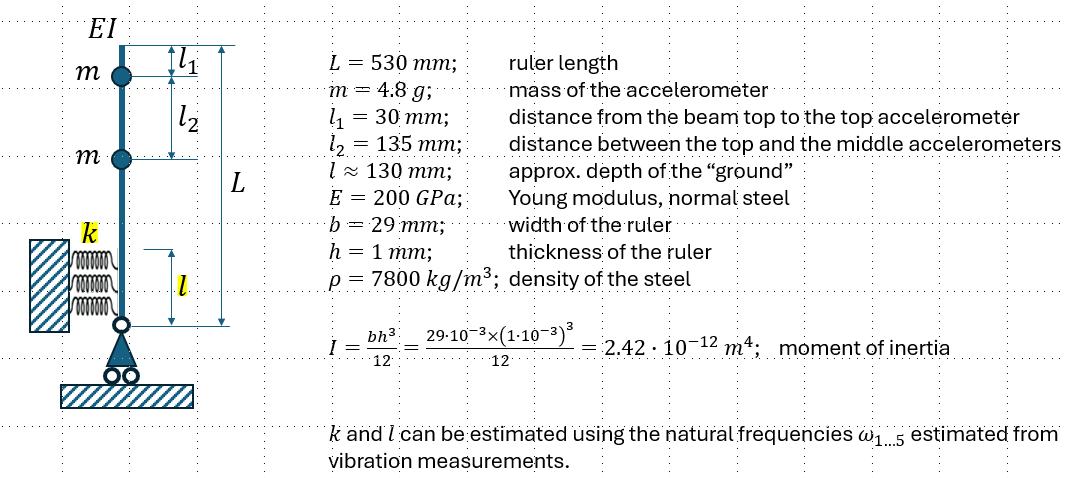

# Giuseppe's cantilever beam

In [1]:
import numpy as np
import gmsh
import sys

l1 = 75e-3
l2 = 75e-3
l3 = 150e-3
l4 = 30e-3
b = 50e-3

# Initialize the Gmsh API
gmsh.initialize()
gmsh.model.list()
gmsh.model.add("cantilever")

# meshsize
lc = b/5

#  9-5--10
# 9| 4  |13
#  7-4--8
# 8| 3  |12
#  5-3--6
# 7| 2  |11
#  3-2--4
# 6| 1  |10
#  1-1--2

# coordinates, meshsize, tag
gmsh.model.geo.add_point(0,0,0,lc,1)
gmsh.model.geo.add_point(b,0,0,lc,2)
gmsh.model.geo.add_point(0,l1,0,lc,3)
gmsh.model.geo.add_point(b,l1,0,lc,4)
gmsh.model.geo.add_point(0,l1+l2,0,lc,5)
gmsh.model.geo.add_point(b,l1+l2,0,lc,6)
gmsh.model.geo.add_point(0,l1+l2+l3,0,lc,7)
gmsh.model.geo.add_point(b,l1+l2+l3,0,lc,8)
gmsh.model.geo.add_point(0,l1+l2+l3+l4,0,lc,9)
gmsh.model.geo.add_point(b,l1+l2+l3+l4,0,lc,10)

# nodes, tag
gmsh.model.geo.add_line(1,2,1)
gmsh.model.geo.add_line(3,4,2)
gmsh.model.geo.add_line(5,6,3)
gmsh.model.geo.add_line(7,8,4)
gmsh.model.geo.add_line(9,10,5)
gmsh.model.geo.add_line(1,3,6)
gmsh.model.geo.add_line(3,5,7)
gmsh.model.geo.add_line(5,7,8)
gmsh.model.geo.add_line(7,9,9)
gmsh.model.geo.add_line(2,4,10)
gmsh.model.geo.add_line(4,6,11)
gmsh.model.geo.add_line(6,8,12)
gmsh.model.geo.add_line(8,10,13)

13

In [2]:
# lines, tag
gmsh.model.geo.add_curve_loop([1,10,2,6],1,True)
gmsh.model.geo.add_curve_loop([2,11,3,7],2,True)
gmsh.model.geo.add_curve_loop([3,12,4,8],3,True)
gmsh.model.geo.add_curve_loop([4,13,5,9],4,True)

gmsh.model.geo.add_plane_surface([1],1)
gmsh.model.geo.add_plane_surface([2],2)
gmsh.model.geo.add_plane_surface([3],3)
gmsh.model.geo.add_plane_surface([4],4)

# dim, tag, name
gmsh.model.add_physical_group(1,[1],1);#name="clamp")
gmsh.model.add_physical_group(1,[3],2);#name="acc2")
gmsh.model.add_physical_group(1,[4],3);#name="acc1")
gmsh.model.add_physical_group(2,[1],4);#name="surface1")
gmsh.model.add_physical_group(2,[2],5);#name="surface2")
gmsh.model.add_physical_group(2,[3],6);#name="surface3")
gmsh.model.add_physical_group(2,[4],7);#name="surface4")

# here we change the colors of some of the entities
gmsh.model.setColor([(2,1)],0,255,255,255,True)
gmsh.model.setColor([(2,2)],255,0,255,255,True)
gmsh.model.setColor([(2,3)],255,255,0,255,True)
gmsh.model.setColor([(2,4)],255,255,0,255,True)

# remove matching entities
gmsh.model.geo.remove_all_duplicates()

# Synchronize the model to build the geometry
gmsh.model.geo.synchronize()

In [3]:
gmsh.option.setNumber("Mesh.Algorithm", 8)

# generate a 2d mesh
gmsh.model.mesh.generate(2)

# triangle to quadrilateral mesh
gmsh.model.mesh.recombine()

# partitioned the mesh
# gmsh.model.mesh.partition(4)

# save the mesh file
gmsh.write("cantilever.msh")

In [6]:
# list of all physical groups
print(gmsh.model.get_physical_groups())

nodeClampTags,nodeClampCoords = gmsh.model.mesh.get_nodes_for_physical_group(1,1)
nodeClampTags,nodeClampCoords

nodeAcc2Tags,nodeAcc2Coords = gmsh.model.mesh.get_nodes_for_physical_group(1,2)
nodeAcc2Tags,nodeAcc2Coords

nodeAcc1Tags,nodeAcc1Coords = gmsh.model.mesh.get_nodes_for_physical_group(1,3)
nodeAcc1Tags,nodeAcc1Coords

[(1, 1), (1, 2), (1, 3), (2, 4), (2, 5), (2, 6), (2, 7)]


(array([ 7,  8, 23, 24, 25, 26], dtype=uint64),
 array([0.  , 0.3 , 0.  , 0.05, 0.3 , 0.  , 0.01, 0.3 , 0.  , 0.02, 0.3 ,
        0.  , 0.03, 0.3 , 0.  , 0.04, 0.3 , 0.  ]))

In [8]:
# get the list of all elements (any dim, any tag)
elementTypes, elementTags, nodeTags = gmsh.model.mesh.get_elements(-1,-1)  

# show the properties for each time
for elementType,elementTag,nodeTag in zip(elementTypes,elementTags,nodeTags):
    print('***')
    print(gmsh.model.mesh.get_element_properties(elementType))
    print(elementType.shape)
    print(elementTag.shape)
    print(nodeTag.shape)

***
('Line 2', 1, 1, 2, array([-1.,  1.]), 2)
()
(93,)
(186,)
***
('Quadrilateral 4', 2, 1, 4, array([-1., -1.,  1., -1.,  1.,  1., -1.,  1.]), 4)
()
(170,)
(680,)
***
('Point', 0, 0, 1, array([0.]), 1)
()
(10,)
(10,)


In [7]:
# Synchronize the model to build the geometry
gmsh.model.geo.synchronize()

# visualize the model, whatever you do here it is avaialble later in the script
if '-nopopup' not in sys.argv:
    gmsh.fltk.run()